# Fetal ECG using Singular Value Decomposition

## Physiological Signal Processing

### Authors

### Óscar Barquero Pérez (<oscar.barquero@urjc.es>) y Rebeca Goya Esteban (<rebeca.goyaesteban@urjc.es>)

### Update 1st Apr 2019

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This wokr is under <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 

# Fetal Electrocardiogram 

Recording the electrical activity of the fetal heart is vital to being able to monitoring the fetus status. Most accurate methods are invasive, e.g. using an electrode attach to the foetal scalpe. However, this approach is only possible during delivery. Therefore it is important to be able to obtain noninvasive techniques, allowing early diagnosis.

One way to obtain the FECG is to obtain a record using electrodes on the mother's skin. This recording can be modeled as the following signal model:


$$x[n] = s_F[n] + s_M[n] + v[n]$$

where $s_F[n]$ is the FECG, which is the main target, $s_M[n]$ is the maternal ECG (MECG), and $v[n]$ is the noise. In this settings, several problems arise in order to estimate the $s_F[n]$:
 * The main interference is $s_M[n]$ MECG.
 * Low signal level of the $s_F[n]$.
 * Relative high nevel of noise, maternal muscle noise, net interference, noise from electrodes and amplifiers.
 * Position of the electrodes, bad locations can difficult the estimation.
 
One major problem is that FECG and MECG spectral contents overlaps each other. This can be seen in the following Figure (taken from [Abboud et al 1989])

![FECG](fecg_spec.png)

# Singular Value Decomposition

The main idea is to obtain a new basis of signals with the following important property: **begin orthogonal**. We assume that when we record a number of leads, all those leads have a mixed of MECG, FECG and Noise. Under the assumption that the three components are orthogonal (in the statistical sense), then a transformation that was able to split the original recordigns into a new set of signals orthogonal would reveal the differente parts. This assumption allows to separete the signals into three supspaces: MECG subspace, FECG subspace and Noise. Obviously the separation will be better if we have enough number of recordings.

In Linear Algebra we can decomposed any real square matrix, $X$ into *eigenvalues* and *eigenvectors*:

$$Xe_i = \lambda_ie_i$$

where $\lambda_i$ are the eigenvalues and $e_i$ are the eigenvectors. If the matrix, $X$ is symmetric, then the eigenvectors are orthonormal:

$$e_i^{T}e_j = \delta_{ij}$$

In matrix notation we can get a compact version of the decomposition:

$$XV = V\Lambda  \Rightarrow X = V\Lambda V^{T}$$

since in an orthonormal matrix $V^{-1}=V^{T}$.

If the matrix $X$ is of dimensions $MxN$ with rank $r$, we can obtain a similar decompostion, called Singular Value Decomposition (SVD), given by:

$$X = U\Lambda^{1/2}V^{T}$$

where $U$ is the orthogonal matrix $MxM$ whose columns are the **eigenvectors** of the matrix $XX^{T}$, and V is the orthogonal matrix $NxN$ whose columns represent the eigenvectors of the matrix $X^{T}X$. Note that we are obtaining the eigenvectors of $XX^{T}$ which is an estimation, given the proper mean and normalization, of the autocorrelation matrix.

We can expect that, using a decomposition of the matrix composed by the recordings, to obtain a separation into different subspaces.

The student is referred to the paper [Callaerts et atl 1990] which has all the needed explanations on how to use SVD to obtain FECG.

# Lab SVD

In this lab we are going to use a signal recorded on a pregnant women. We are going to use only 4 leads, which are very few, but hopefully enoug to illustrate the point.

We are going to use SVD decomposition, then projection onto the columns of $V$ matrix, which are eigenvectors of the matrix $X^{T}X$. We are going to select the new directions (signals) which correspond to the supbspace of the FECG, and then reconstruct $X$ using only the eigenvectors corresponding to the FECG subpsace.

Let's go!




(-299.95, 6298.95, -67.125, 19.225)

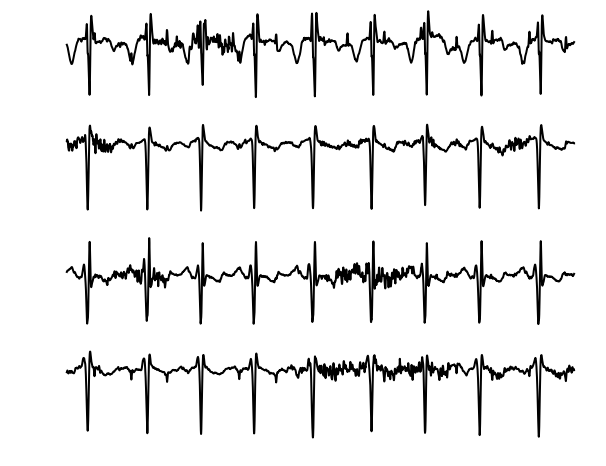

In [16]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
#read txt
ecg = np.loadtxt('./fecg/a21.csv',skiprows=2,delimiter=',')

#plot the recorded signal

plt.figure(figsize = (10,8))

plt.subplot(411)
plt.plot(ecg[6000:6000*2,1],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(412)
plt.plot(ecg[6000:6000*2,2],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(413)
plt.plot(ecg[6000:6000*2,3],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(414)
plt.plot(ecg[6000:6000*2,4],linewidth = 2,color = 'black')
plt.axis('off')

It can been seen that there is some some QRS from the FECG in the first and the last lead. We are going to perform the SVD decomposition under the assumption that the FECG and MECG are orthogonal (from a statistical point of view). Then, if we project the ECG into de eigenvectors, we should be able to see some projected signals with a main contribution of the FECG. 

(-299.95, 6298.95, -59.70781371409887, 21.061178474360833)

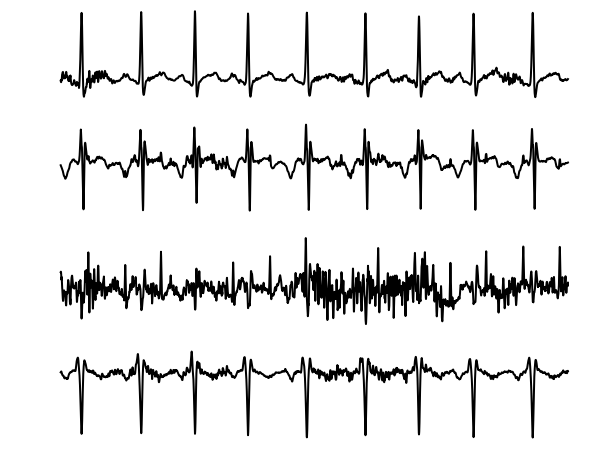

In [17]:
#SVD
u,s,v = np.linalg.svd(ecg[6000:6000*2,1:],full_matrices=False)

#projection onto v vectors

proj = ecg[6000:6000*2,1:].dot(v)

#plot projections
plt.figure(figsize = (10,8))

plt.subplot(411)
plt.plot(proj[:,0],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(412)
plt.plot(proj[:,1],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(413)
plt.plot(proj[:,2],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(414)
plt.plot(proj[:,3],linewidth = 2,color = 'black')
plt.axis('off')

In this projections we can see that the third principal signal has as main contribution the FECG, however with a lot of noise.

May the number of recorded signals an the position of electrodes were not enough to decompose the matrix intro MECG, FECG and Noise subspaces.

We can reconstruc the initial matrix of data using only the last two eigenvectors as follow. This way we can see the contribution of each lead to the FECG

```{python}
>>> recons = np.dot(u[:,2:],np.dot(np.diag(s[2:]),v[2:,:]))
```

(-299.95, 6298.95, -34.665, 116.365)

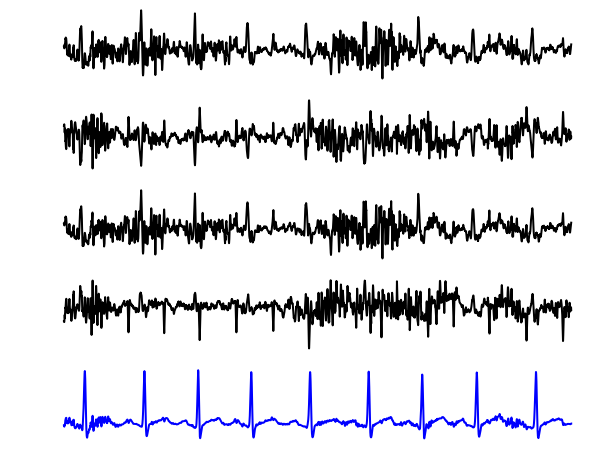

In [18]:
#reconstruction
recons = np.dot(u[:,2:],np.dot(np.diag(s[2:]),v[2:,:]))

#plot projections
plt.figure(figsize = (10,8))

plt.subplot(511)
plt.plot(recons[:,0],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(512)
plt.plot(recons[:,1],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(513)
plt.plot(recons[:,2],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(514)
plt.plot(recons[:,3],linewidth = 2,color = 'black')
plt.axis('off')
plt.subplot(515)
plt.plot(-ecg[6000:6000*2,2],linewidth = 2,color='blue')
plt.axis('off')

From the figure you can see that the reconstruction using only the las two eigenvalues and eigenvectors allows to recover the FECG contribution from each real lead, so the specialists can rely on the electrodes locations to interpret de FECG. For sake of comparison we have sketeched one lead of the original ECG with the MECG (in blue at the bottom) presents. It can be easily verify the different heart rhythm. 

# References

 1. [Abboud et al. 1989] Abboud, S., & Sadeh, D. (1989). Spectral analysis of the fetal electrocardiogram. Computers in Biology and Medicine, 19(6), 409–415. doi:10.1016/0010-4825(89)90076-0 
 1. [Callaerts et atl 1990] D. Callaerts, B. De Moor, J. Vandewalle, W. Sansen, G. Vantrappen, J. Janssens. Comparison of SVD methods to extract the foetal electrocardiogram from cutaneous electrode signals. Medical and Biological Engineering and Computing. May 1990, 28:217